In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn
import datetime

import time
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from tweeter_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [3]:
def tweet_bot():
# i thought we need to analyze three mentions
    target_terms = ("@WeAreMessi", "@Cristiano", "@neymarjr")

    results_list = []

    for target in target_terms:

        oldest_tweet = None

        # Variables for holding sentiments
        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []
        tweets_ago = []

        counter = 0

        for x in range(5):

            # Run search around each tweet
            public_tweets = api.search(target,
                                count=100,
                                result_type="recent",
                                max_id=oldest_tweet)

            for tweet in public_tweets["statuses"]:

                results = analyzer.polarity_scores(tweet['text'])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                counter += 1

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                tweets_ago.append(counter)

                # Set the new oldest_tweet value
                oldest_tweet = tweet["id"] - 1

        scores = {
            "Mentioned" : target,
            "Compound Scores" : compound_list,
            "Postive Scores" : positive_list,
            "Neutral Scores" : neutral_list,
            "Negative Scores" : negative_list,
            "Tweets Ago" : tweets_ago
        }

        results_list.append(scores)
        
    df_messi = pd.DataFrame(results_list[0])
    
    df_ronaldo = pd.DataFrame(results_list[1])
    
    df_neymar = pd.DataFrame(results_list[2])
    
    date = datetime.datetime.today().strftime('%Y-%m-%d')
    
    plt.plot(df_messi['Tweets Ago'], df_messi['Compound Scores'], marker='o', color='blue', alpha=0.5)
    plt.title(f"Sentimental Analysis of Messi {date}")
    plt.xlabel('Tweet Ago')
    plt.ylabel('Tweet Polarity')
    plt.xlim((df_messi['Tweets Ago'].max() + 5), (df_messi['Tweets Ago'].min() - 5))
    plt.grid()
    plt.savefig('messi.png')
    
    api.update_with_media("messi.png", "Messi reputation for every five munites")
    
    return

#     plt.plot(df_ronaldo['Tweets Ago'], df_ronaldo['Compound Scores'], marker='o', color='blue', alpha=0.5)
#     plt.title(f"Sentimental Analysis of C7 {date}")
#     plt.xlabel('Tweet Ago')
#     plt.ylabel('Tweet Polarity')
#     plt.xlim((df_ronaldo['Tweets Ago'].max() + 5), (df_ronaldo['Tweets Ago'].min() - 5))
#     plt.grid()
#     plt.savefig('ronaldo.png')
    
#     plt.plot(df_neymar['Tweets Ago'], df_neymar['Compound Scores'], marker='o', color='blue', alpha=0.5)
#     plt.title(f"Sentimental Analysis of Neymar {date}")
#     plt.xlabel('Tweet Ago')
#     plt.ylabel('Tweet Polarity')
#     plt.xlim((df_neymar['Tweets Ago'].max() + 5), (df_neymar['Tweets Ago'].min() - 5))
#     plt.grid()
#     plt.savefig('neymar.png')
    
    



KeyboardInterrupt: 

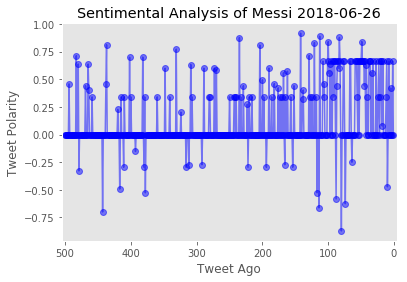

In [4]:
while True:
    tweet_bot()
    time.sleep(300)